In [4]:
import yfinance as yf
import pandas as pd

In [5]:
sp500 = yf.Ticker("^GSPC")

In [6]:
sp500 = sp500.history(period="max")

In [7]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-19,3849.909912,3900.449951,3838.500000,3899.889893,3766850000,0,0
2022-09-20,3875.229980,3876.010010,3827.540039,3855.929932,4058050000,0,0
2022-09-21,3871.399902,3907.070068,3789.489990,3789.929932,4078330000,0,0


In [8]:
# show index
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23'],
              dtype='datetime64[ns]', name='Date', length=18301, freq=None)

<AxesSubplot:xlabel='Date'>

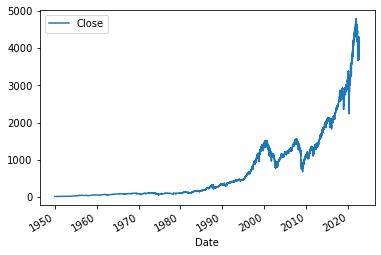

In [9]:
#Plot a line graph for the closing price
sp500.plot.line(y="Close", use_index=True)

In [10]:
# delete redundant columns

del sp500["Dividends"]
del sp500["Stock Splits"]

### Set up target for machine learning

In [11]:
# shift the days

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-09-19,3849.909912,3900.449951,3838.500000,3899.889893,3766850000,3855.929932
2022-09-20,3875.229980,3876.010010,3827.540039,3855.929932,4058050000,3789.929932
2022-09-21,3871.399902,3907.070068,3789.489990,3789.929932,4078330000,3757.989990


In [13]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-09-19,3849.909912,3900.449951,3838.500000,3899.889893,3766850000,3855.929932,0
2022-09-20,3875.229980,3876.010010,3827.540039,3855.929932,4058050000,3789.929932,0
2022-09-21,3871.399902,3907.070068,3789.489990,3789.929932,4078330000,3757.989990,0


In [15]:
sp500 = sp500.loc["1990-01-01":].copy()

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-09-19,3849.909912,3900.449951,3838.500000,3899.889893,3766850000,3855.929932,0
2022-09-20,3875.229980,3876.010010,3827.540039,3855.929932,4058050000,3789.929932,0
2022-09-21,3871.399902,3907.070068,3789.489990,3789.929932,4078330000,3757.989990,0


### Training an Initial Machine Learning Model

> Random Forest Regressor work by training the many individual decision trees  with randomized parameter and  then averages from decision trees.

>  The higher the n_estimator, the better the model is

>  min_sample_split protect over_fitting. The higher is it set, the less  accurate the model 

>  if we ran the same model twice, we will get the same result when the random_state = 1

In [17]:

#import sklearn
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1 )

This is a time series data, so cross validation does not work with it. 
If you do, your result will be amazing with the training and worrible in the real world

In [18]:
# all rows except last 100 
train = sp500.iloc[:-100]

# the last 100 rows
test = sp500.iloc[-100:]

predictors = ["Close",  "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


In [ ]:
# what percentage of the prediction we said went up actually went up
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


In [ ]:
preds = pd.Series(preds, index=test.index)

In [ ]:
preds

Date
2022-04-25    0
2022-04-26    0
2022-04-27    1
2022-04-28    0
2022-04-29    0
             ..
2022-09-09    1
2022-09-12    1
2022-09-13    1
2022-09-14    0
2022-09-15    1
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"], preds)

0.4523809523809524

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

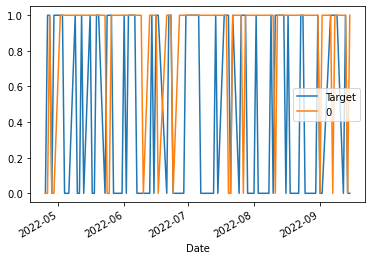

In [ ]:
combined.plot()

### BUILDING A BACKTESTING SYSTEM

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0    3339
1    2402
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5345545378850958

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.535969
0    0.464031
Name: Target, dtype: float64

## ADDING ADITIONAL PREDICTORS TO OUR MODEL

In [ ]:
horizons = [2,5,60,250,1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,4110.410156,1,1.007578,2.0,1.022676,3.0,1.019287,29.0,0.940748,122.0,1.147454,543.0
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,3932.689941,0,1.005264,2.0,1.023916,4.0,1.028699,29.0,0.950998,123.0,1.159213,543.0
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,3946.010010,1,0.977904,1.0,0.978451,4.0,0.983131,29.0,0.910341,122.0,1.108779,543.0


In [ ]:
sp500 = sp500.dropna()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,3966850000,4067.360107,1,1.003294,2.0,1.012411,3.0,1.005349,28.0,0.926253,122.0,1.130564,543.0
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,4110.410156,1,1.007578,2.0,1.022676,3.0,1.019287,29.0,0.940748,122.0,1.147454,543.0
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,3932.689941,0,1.005264,2.0,1.023916,4.0,1.028699,29.0,0.950998,123.0,1.159213,543.0


In [ ]:
## IMPROVING OUR MODEL
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= .6] =1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    3935
1.0     805
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5701863354037268